In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
def acf_pacf(x, qtd_lag):
    fig = plt.figure(figsize=(16,10))
    ax1 = fig.add_subplot(221)
    fig = sm.graphics.tsa.plot_acf(x, lags=qtd_lag, ax=ax1)
    ax2 = fig.add_subplot(222)
    fig = sm.graphics.tsa.plot_pacf(x, lags=qtd_lag, ax=ax2)
    plt.show()

In [3]:
sudeste_path = '../data/parquet/regiao/CENTRO-OESTE.parquet'
df = pd.read_parquet(sudeste_path)
df.head()

,Nome do RCBP,Sexo,Data de Nascimento,Idade,Raca/Cor,Nacionalidade,Naturalidade Estado,Naturalidade,Grau de Instrução,Estado Civil,...,Lateralidade,Estadiamento,TNM,Status Vital,Tipo do Obito,Data do Óbito,Data de Último Contato,Data de Diagnostico,Metástase à distância,Regiao
20986,RCBP CAMPO GRANDE,FEMININO,18/05/1935,68.0,BRANCO,BRASIL,Não informado,None,SEM INFORMAÇÃO,SEM INFORMAÇÃO,...,None,nan,nan,None,None,None,None,31/12/2003,None,CENTRO-OESTE
20987,RCBP CAMPO GRANDE,MASCULINO,03/09/1945,57.0,BRANCO,Não informado,Não informado,Não Informado,SEM INFORMAÇÃO,SEM INFORMAÇÃO,...,None,nan,nan,None,CÂNCER,29/05/2003,None,15/05/2003,None,CENTRO-OESTE
20988,RCBP CAMPO GRANDE,FEMININO,20/06/1994,8.0,AMARELA,Não informado,Não informado,Não Informado,SEM INFORMAÇÃO,SEM INFORMAÇÃO,...,None,nan,nan,None,CÂNCER,24/01/2003,None,24/01/2003,None,CENTRO-OESTE
20989,RCBP CAMPO GRANDE,FEMININO,19/10/1923,79.0,BRANCO,BRASIL,Não informado,Não Informado,SEM INFORMAÇÃO,SEM INFORMAÇÃO,...,None,nan,nan,None,CÂNCER,01/09/2003,None,01/09/2003,None,CENTRO-OESTE
20990,RCBP CAMPO GRANDE,FEMININO,24/07/1936,66.0,BRANCO,BRASIL,Não informado,Não Informado,SEM INFORMAÇÃO,SEM INFORMAÇÃO,...,None,nan,nan,None,None,None,None,11/04/2003,None,CENTRO-OESTE


# Verificação Inicial

In [4]:
df.shape

(322431, 37)

In [5]:
df['Data de Diagnostico'].count()

233435

In [6]:
df['Data de Diagnostico'] = pd.to_datetime(df['Data de Diagnostico'], format='%d/%m/%Y')

In [7]:
df['Data de Diagnostico'].count()

233435

In [8]:
df = df.sort_values(by='Data de Diagnostico')

In [9]:
df.head()

,Nome do RCBP,Sexo,Data de Nascimento,Idade,Raca/Cor,Nacionalidade,Naturalidade Estado,Naturalidade,Grau de Instrução,Estado Civil,...,Lateralidade,Estadiamento,TNM,Status Vital,Tipo do Obito,Data do Óbito,Data de Último Contato,Data de Diagnostico,Metástase à distância,Regiao
702539,RCBP DISTRITO FEDERAL,MASCULINO,20/10/1934,64.0,BRANCO,BRASIL,Não informado,None,SEM INFORMAÇÃO,SEM INFORMAÇÃO,...,None,nan,nan,None,CÂNCER,03/01/1999,None,1999-01-01,None,CENTRO-OESTE
704641,RCBP DISTRITO FEDERAL,FEMININO,14/07/1954,44.0,BRANCO,Não informado,Não informado,None,SEM INFORMAÇÃO,SEM INFORMAÇÃO,...,None,nan,nan,None,None,05/01/1999,None,1999-01-01,None,CENTRO-OESTE
704612,RCBP DISTRITO FEDERAL,FEMININO,03/07/1956,42.0,BRANCO,Não informado,Não informado,None,SEM INFORMAÇÃO,SEM INFORMAÇÃO,...,None,nan,nan,None,None,14/01/1999,None,1999-01-01,None,CENTRO-OESTE
704591,RCBP DISTRITO FEDERAL,FEMININO,06/12/1930,68.0,BRANCO,Não informado,Não informado,None,SEM INFORMAÇÃO,SEM INFORMAÇÃO,...,None,nan,nan,None,None,15/04/1999,None,1999-01-01,None,CENTRO-OESTE
704589,RCBP DISTRITO FEDERAL,FEMININO,28/03/1910,88.0,BRANCO,Não informado,Não informado,None,SEM INFORMAÇÃO,SEM INFORMAÇÃO,...,None,nan,nan,None,None,11/04/1999,None,1999-01-01,None,CENTRO-OESTE


In [10]:
df.tail()

,Nome do RCBP,Sexo,Data de Nascimento,Idade,Raca/Cor,Nacionalidade,Naturalidade Estado,Naturalidade,Grau de Instrução,Estado Civil,...,Lateralidade,Estadiamento,TNM,Status Vital,Tipo do Obito,Data do Óbito,Data de Último Contato,Data de Diagnostico,Metástase à distância,Regiao
1712205,RCBP GOIÂNIA,MASCULINO,None,45.0,SEM INFORMAÇÃO,None,None,None,None,None,...,None,nan,nan,None,None,None,None,NaT,None,CENTRO-OESTE
1712206,RCBP GOIÂNIA,MASCULINO,None,61.0,SEM INFORMAÇÃO,None,None,None,None,None,...,None,nan,nan,None,None,None,None,NaT,None,CENTRO-OESTE
1712207,RCBP GOIÂNIA,MASCULINO,None,41.0,PARDA,None,None,None,None,None,...,None,nan,nan,None,None,None,None,NaT,None,CENTRO-OESTE
1712208,RCBP GOIÂNIA,MASCULINO,None,82.0,SEM INFORMAÇÃO,None,None,None,None,None,...,None,nan,nan,None,None,None,None,NaT,None,CENTRO-OESTE
1712209,RCBP GOIÂNIA,FEMININO,None,51.0,BRANCO,None,None,None,None,None,...,None,nan,nan,None,None,None,None,NaT,None,CENTRO-OESTE


In [11]:
print(df['Data de Diagnostico'].min())
print(df['Data de Diagnostico'].max())

1999-01-01 00:00:00
2018-12-31 00:00:00


In [12]:
datas = pd.date_range(start='1999-01-01', end='2018-12-31', freq='ME')
print(len(datas))

240


In [13]:
n_unique_months = df['Data de Diagnostico'].dt.to_period('M').nunique()

print(n_unique_months)

240


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 322431 entries, 702539 to 1712209
Data columns (total 37 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   Nome do RCBP                      322431 non-null  object        
 1   Sexo                              322431 non-null  object        
 2   Data de Nascimento                216311 non-null  object        
 3   Idade                             311865 non-null  float64       
 4   Raca/Cor                          309034 non-null  object        
 5   Nacionalidade                     222848 non-null  object        
 6   Naturalidade Estado               222848 non-null  object        
 7   Naturalidade                      118611 non-null  object        
 8   Grau de Instrução                 233435 non-null  object        
 9   Estado Civil                      233435 non-null  object        
 10  Código Profissão               

# Verificação Temporal por Doença

In [15]:
df_mama = df[df['Descrição da Doenca'].isin(['MAMA , SOE', 'QUADRANTE SUPERIOR EXTERNO DA MAMA', 'PROLONGAMENTO AXILAR DA MAMA',
                                            'QUADRANTE SUPERIOR INTERNO DA MAMA', 'CARCINOMA "IN SITU" DA MAMA, SOE',
                                            'PORCAO CENTRAL DA MAMA', 'QUADRANTE INFERIOR EXTERNO DA MAMA',
                                            'LESAO INVASIVA DA MAMA', 'QUADRANTE INFERIOR INTERNO DA MAMA', 'MAMA'])]

df_prostata = df[df['Descrição da Doenca'] == 'PROSTATA']

df_colo_utero = df[df['Descrição da Doenca'].isin(['COLO DO UTERO, SOE', 'OUTRAS PARTES DO COLO DO UTERO',
                                                  'LESAO INVASIVA DO COLO DO UTERO', 'COLO DO UTERO',
                                                  'CARCINOMA "IN SITU" DO COLO DO UTERO (CERVIX)'])]

df_pele = df[df['Descrição da Doenca'].isin(['PELE DE OUTRAS PARTES DA FACE, SOE', 'PELE DE OUTRAS PARTES DA FACE',
                                            'PELE DO MEMBRO INFERIOR E DO QUADRIL','PELE DA PALPEBRA E CANTO',
                                            'PELE DO TRONCO','NEOPLASIA MALIGNA DA PELE','PELE DO COURO CABELUDO E DO PESCOCO',
                                            'PELE DA ORELHA E CONDUTO AUDITIVO EXTERNO','PELE DO MEMBRO SUPERIOR E DO OMBRO',
                                            'PELE DOS MEMBROS SUPERIORES, INCLUINDO OMBRO','PELE DO LABIO',
                                            'PELE DA ORELHA E DO CONDUTO AUDITIVO EXTERNO','SARCOMA DE KAPOSI DA PELE',
                                            'PELE DA PALPEBRA, INCLUINDO CANTO','PELE DOS MEMBROS INFERIORES, INCLUINDO QUADRIL',
                                            'MELANOMA MALIGNO DA PELE, SOE','PELE, SOE','LESAO INVASIVA DA PELE',
                                            'MELANOMA MALIGNO INVASIVO DA PELE','PELE DE OUTRAS LOCALIZACOES',
                                            'OUTRAS NEOPLASIAS MALIGNAS DA PELE'])]

df_pulmao = df[df['Descrição da Doenca'].isin(['BRONQUIOS OU PULMOES, SOE', 'BRONQUIOS E PULMOES',
                                              'LESAO INVASIVA DOS BRONQUIOS E DOS PULMOES'])]

In [16]:
df_mama = df_mama.sort_values(by='Data de Diagnostico')
df_prostata = df_prostata.sort_values(by='Data de Diagnostico')
df_colo_utero = df_colo_utero.sort_values(by='Data de Diagnostico')
df_pele = df_pele.sort_values(by='Data de Diagnostico')
df_pulmao = df_pulmao.sort_values(by='Data de Diagnostico')

In [17]:
df_mama = df_mama.set_index('Data de Diagnostico')
df_prostata = df_prostata.set_index('Data de Diagnostico')
df_colo_utero = df_colo_utero.set_index('Data de Diagnostico')
df_pele = df_pele.set_index('Data de Diagnostico')
df_pulmao = df_pulmao.set_index('Data de Diagnostico')

In [18]:
result_mama = df_mama.resample("ME")['Nome do RCBP'].count()
result_prostata = df_prostata.resample("ME")['Nome do RCBP'].count()
result_colo_utero = df_colo_utero.resample("ME")['Nome do RCBP'].count()
result_pele = df_pele.resample("ME")['Nome do RCBP'].count()
result_pulmao = df_pulmao.resample("ME")['Nome do RCBP'].count()

#### Mama

<Axes: xlabel='Data de Diagnostico'>

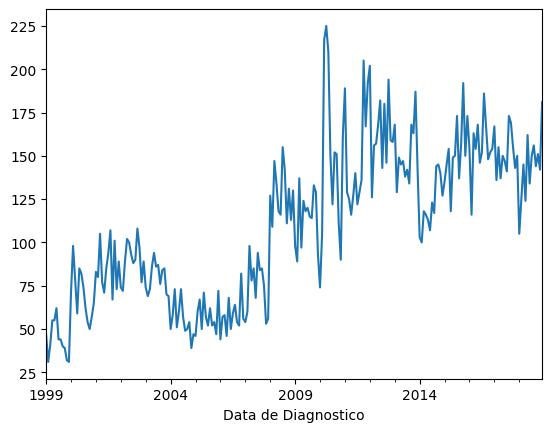

In [19]:
result_mama.plot()

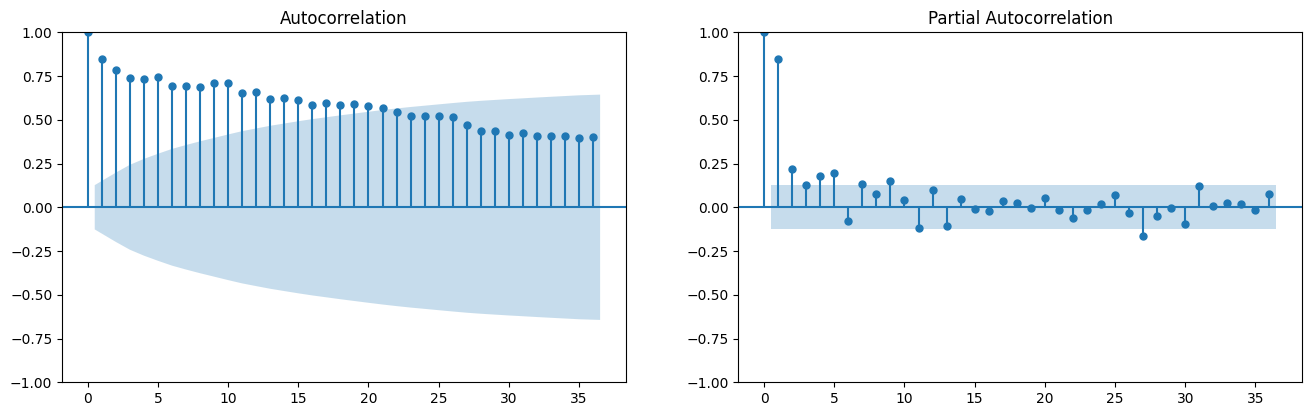

In [20]:
acf_pacf(result_mama.values, 36)

#### Prostata

<Axes: xlabel='Data de Diagnostico'>

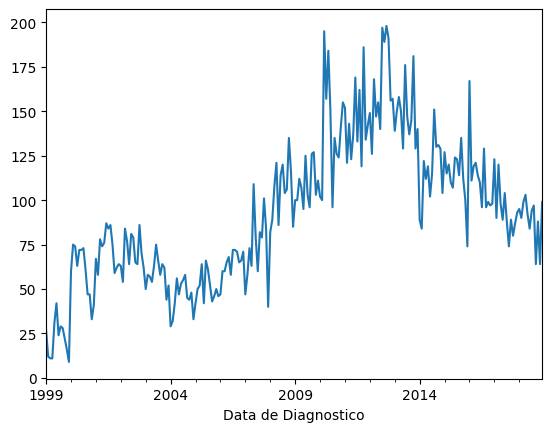

In [21]:
result_prostata.plot()

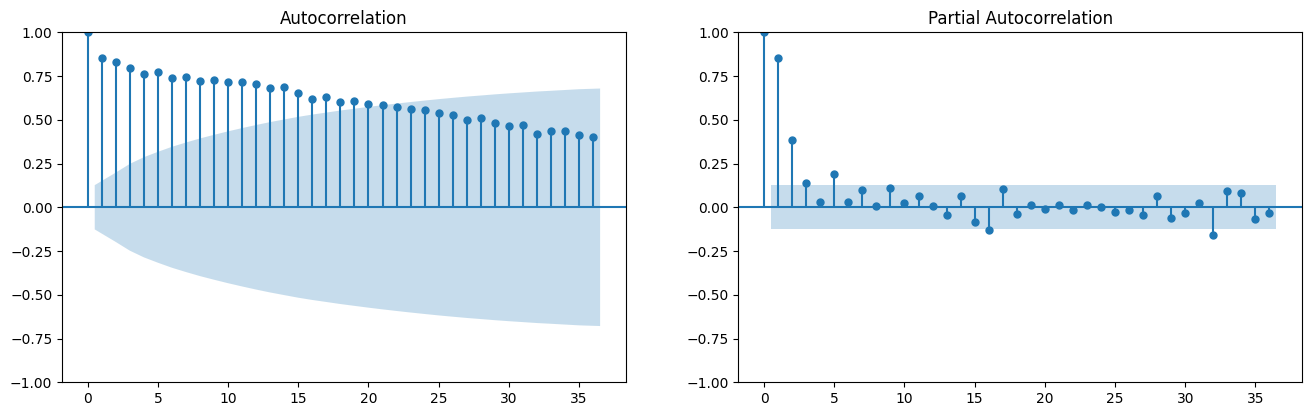

In [22]:
acf_pacf(result_prostata.values, 36)

#### Utero

<Axes: xlabel='Data de Diagnostico'>

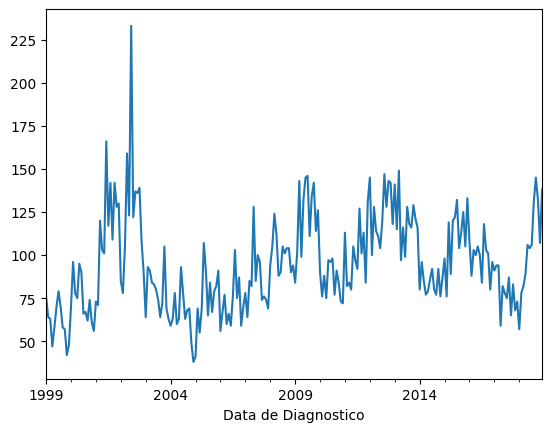

In [23]:
result_colo_utero.plot()

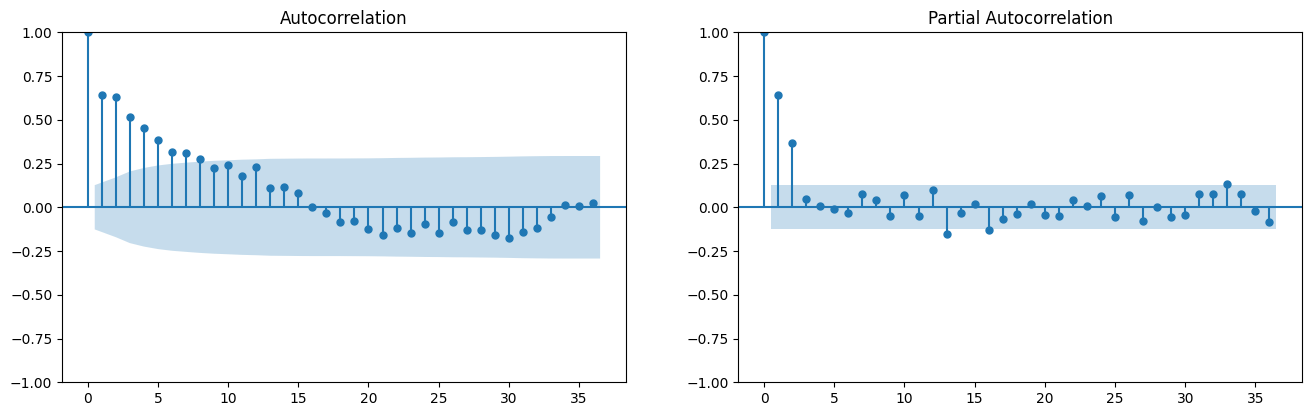

In [24]:
acf_pacf(result_colo_utero.values, 36)

#### Pele

<Axes: xlabel='Data de Diagnostico'>

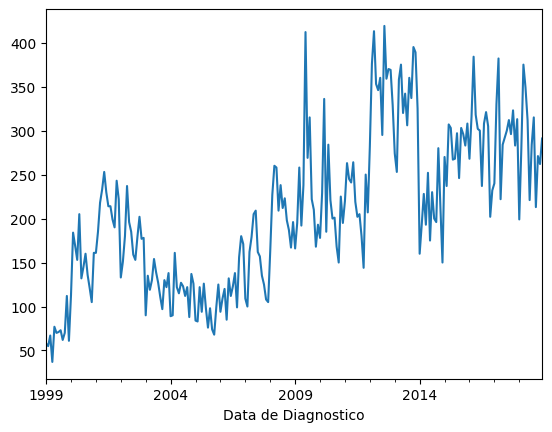

In [25]:
result_pele.plot()

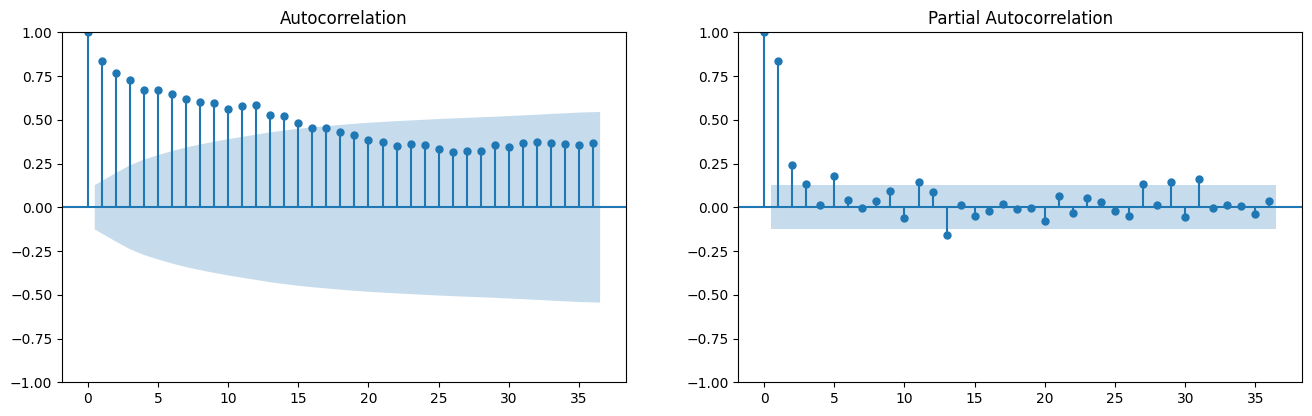

In [26]:
acf_pacf(result_pele.values, 36)

#### Pulmao

<Axes: xlabel='Data de Diagnostico'>

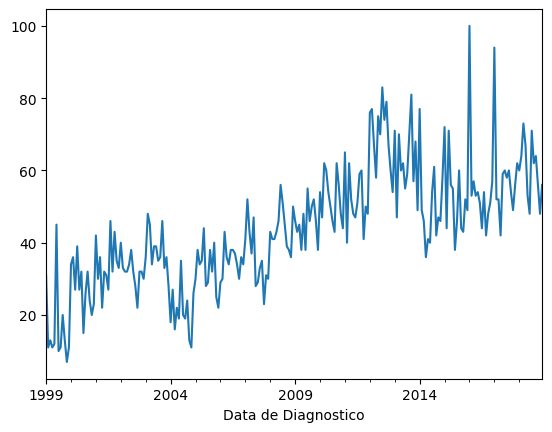

In [27]:
result_pulmao.plot()

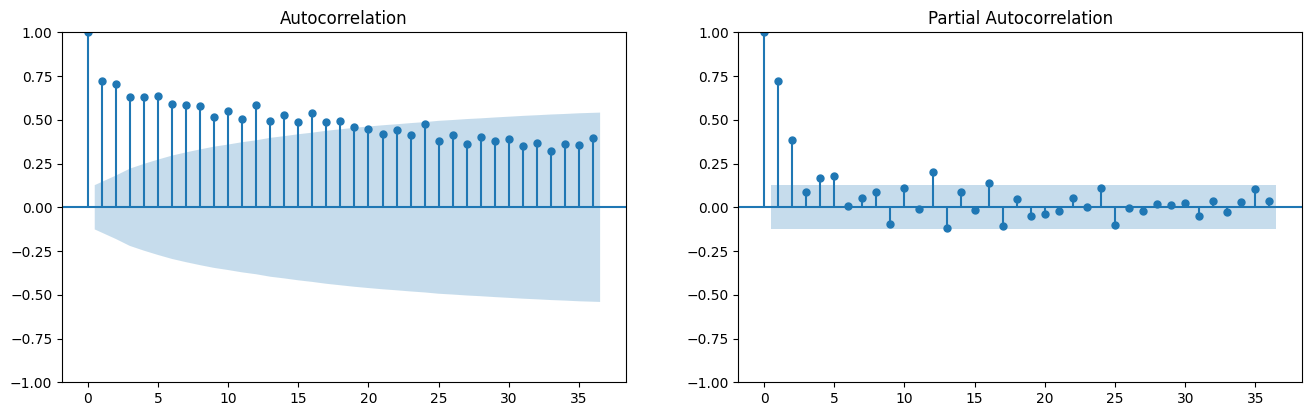

In [28]:
acf_pacf(result_pulmao.values, 36)